<a href="https://colab.research.google.com/github/shahmoksheet/sustainable-energy/blob/main/Week1_Global_Energy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries (uncomment if needed)
# !pip install pandas matplotlib seaborn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)



In [2]:
# Replace the path with your uploaded file path in Colab
file_path = "/content/global-data-on-sustainable-energy (1).csv"
df = pd.read_csv(file_path)

# Basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
df.head()


Shape: (3649, 21)

Columns:
 Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country',
       'Renewables (% equivalent primary energy)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
       'Longitude'],
      dtype='object')


,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
# Check for missing values
df.isnull().sum()

# Get basic statistics
df.describe(include='all')

# Check unique entities (countries/regions)
print("Unique Entities:", df['Entity'].nunique())
print(df['Entity'].unique()[:20])  # preview first 20


Unique Entities: 176
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda']


In [4]:
# Convert percentage columns to numeric (if stored as strings)
percent_cols = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)'
]

for col in percent_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values - strategy: fill with mean or drop
df_clean = df.fillna(df.mean(numeric_only=True))  # basic strategy



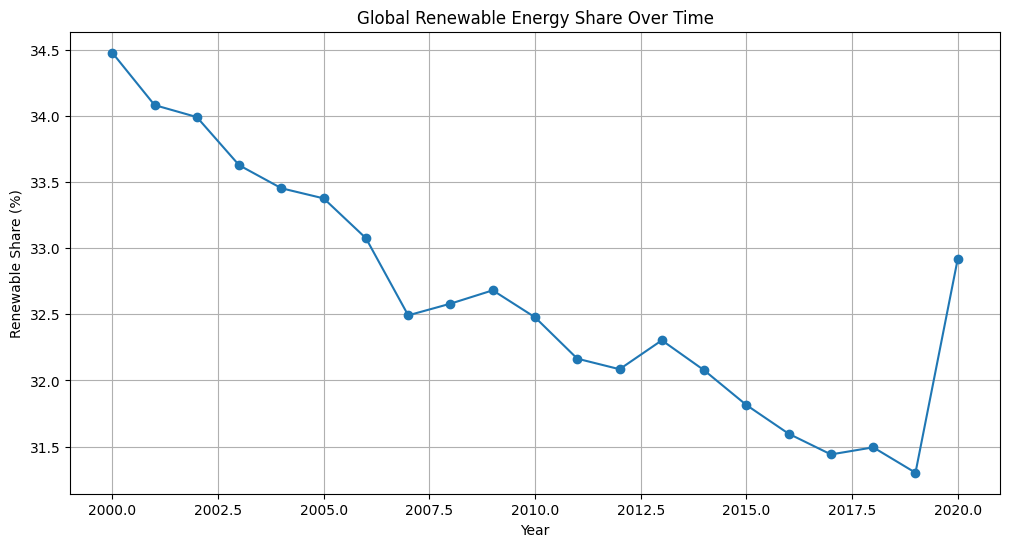

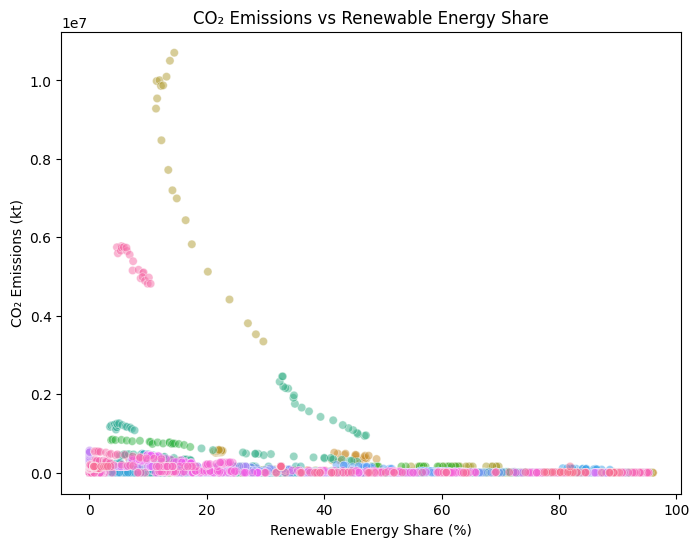

In [6]:
# Renewable energy share over years (Global)
plt.figure(figsize=(12,6))
global_trend = df_clean.groupby('Year')['Renewable energy share in the total final energy consumption (%)'].mean()
plt.plot(global_trend.index, global_trend.values, marker='o')
plt.title("Global Renewable Energy Share Over Time")
plt.xlabel("Year")
plt.ylabel("Renewable Share (%)")
plt.grid(True)
plt.show()

# CO2 emissions vs Renewable share
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_clean,
    x='Renewable energy share in the total final energy consumption (%)',
    y='Value_co2_emissions_kt_by_country',
    hue='Entity', alpha=0.5, legend=False
)
plt.title("CO₂ Emissions vs Renewable Energy Share")
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("CO₂ Emissions (kt)")
plt.show()

# Top 10 countries by renewable electricity generation capacity (latest year)
latest_year = df_clean['Year'].max()
top_renewables = (
    df_clean[df_clean['Year'] == latest_year]
    .sort_values(by='Renewable-electricity-generating-capacity-per-capita', ascending=False)
    .head(10)
)
fig = px.bar(
    top_renewables,
    x='Entity',
    y='Renewable-electricity-generating-capacity-per-capita',
    title=f"Top 10 Countries by Renewable Electricity Capacity in {latest_year}"
)
fig.update_layout(xaxis_title="Country", yaxis_title="Renewable Electricity Generating Capacity (per capita)")
fig.show()

In [7]:
# Check missing values
df.isnull().sum()

# Summary statistics
df.describe(include='all')

# Countries count
print("Unique Entities:", df['Entity'].nunique())
print(df['Entity'].unique()[:20])



Unique Entities: 176
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bermuda']


In [8]:
# Columns with percentages
percent_cols = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)'
]

for col in percent_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values by filling numeric with mean
df_clean = df.fillna(df.mean(numeric_only=True))



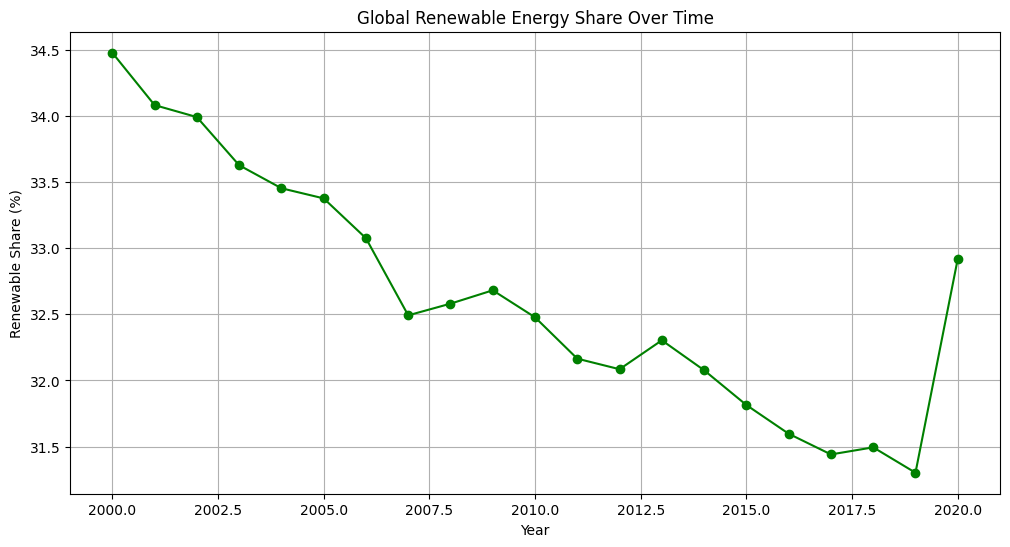

In [9]:
# Global renewable share trend
plt.figure(figsize=(12,6))
global_trend = df_clean.groupby('Year')['Renewable energy share in the total final energy consumption (%)'].mean()
plt.plot(global_trend.index, global_trend.values, marker='o', color='green')
plt.title("Global Renewable Energy Share Over Time")
plt.xlabel("Year")
plt.ylabel("Renewable Share (%)")
plt.grid(True)
plt.show()

# Top 10 countries by renewable capacity (latest year)
latest_year = df_clean['Year'].max()
top_renewables = (
    df_clean[df_clean['Year'] == latest_year]
    .sort_values(by='Renewable-electricity-generating-capacity-per-capita', ascending=False)
    .head(10)
)
fig = px.bar(
    top_renewables,
    x='Entity',
    y='Renewable-electricity-generating-capacity-per-capita',
    title=f"Top 10 Countries by Renewable Electricity Capacity in {latest_year}"
)
fig.show()


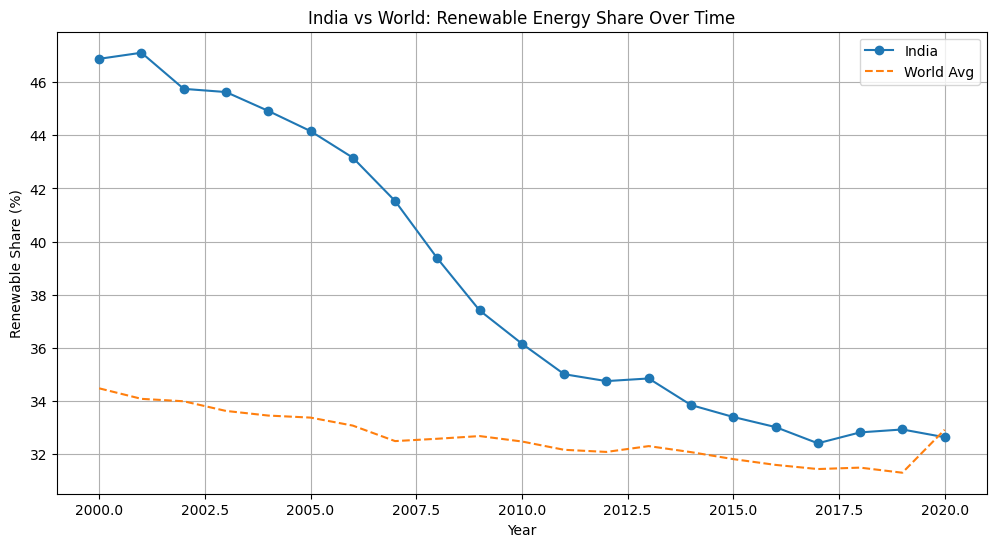

In [10]:
# Filter India data
india_data = df_clean[df_clean['Entity'] == 'India']
world_avg = df_clean.groupby('Year').mean(numeric_only=True)

plt.figure(figsize=(12,6))
plt.plot(india_data['Year'], india_data['Renewable energy share in the total final energy consumption (%)'], label='India', marker='o')
plt.plot(world_avg.index, world_avg['Renewable energy share in the total final energy consumption (%)'], label='World Avg', linestyle='--')
plt.title("India vs World: Renewable Energy Share Over Time")
plt.xlabel("Year")
plt.ylabel("Renewable Share (%)")
plt.legend()
plt.grid(True)
plt.show()


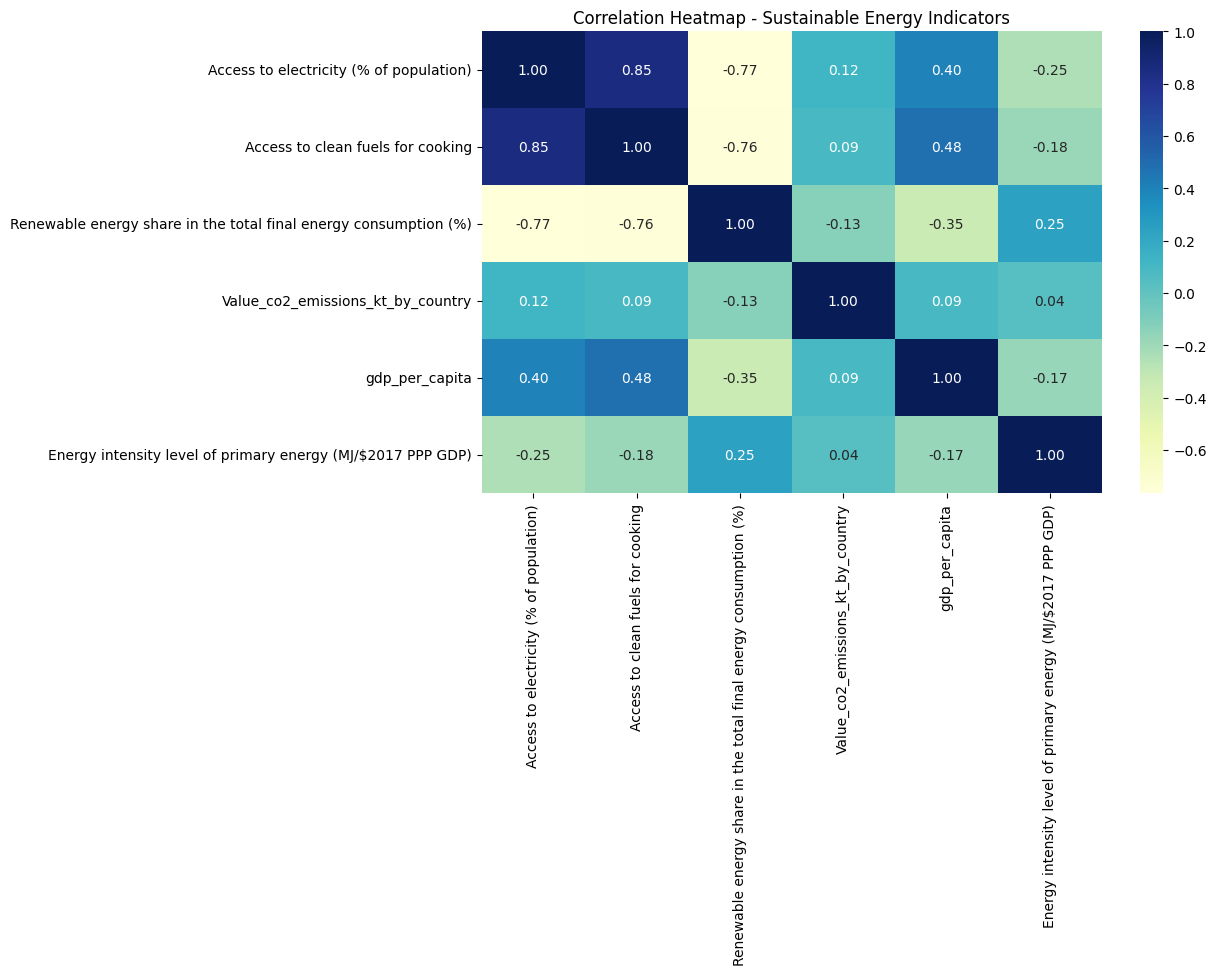

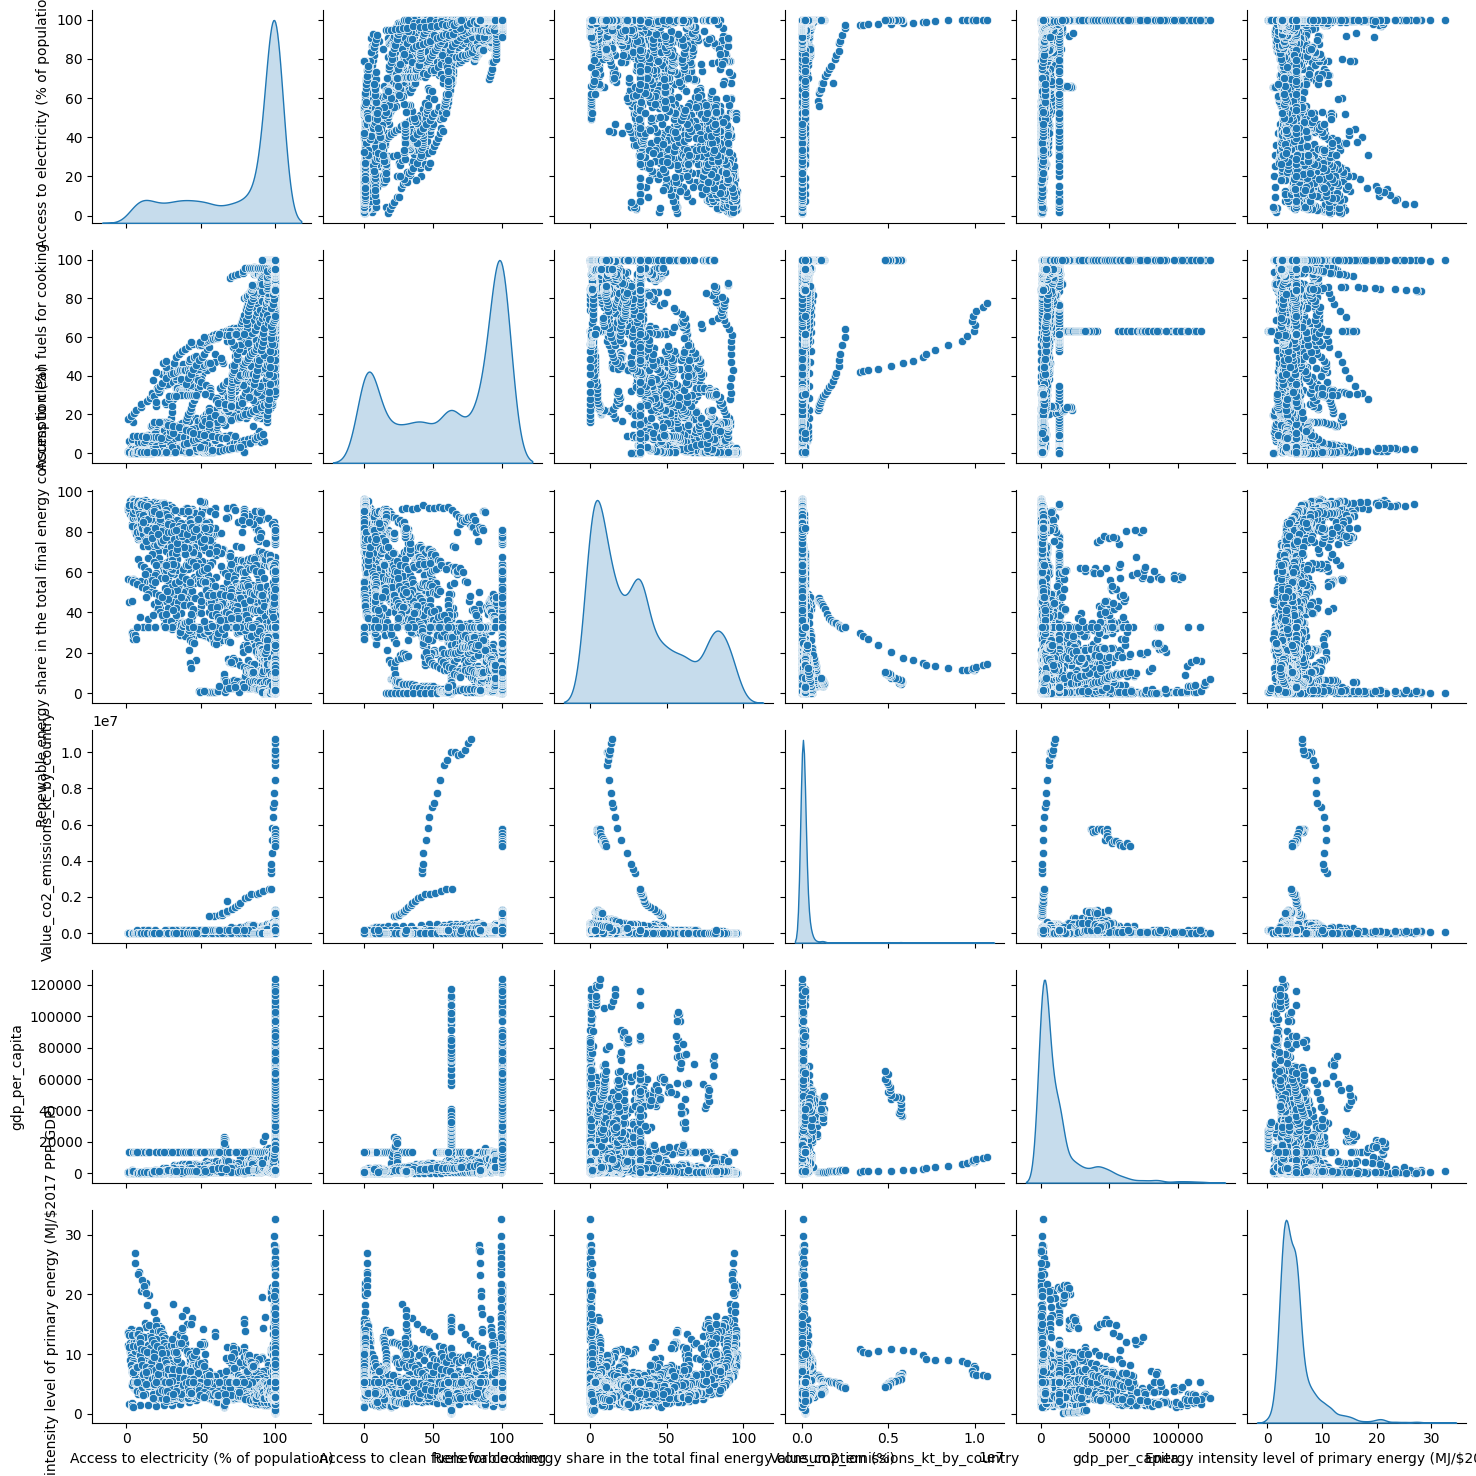

In [11]:
# Select relevant numerical columns
corr_cols = [
    'Access to electricity (% of population)',
    'Access to clean fuels for cooking',
    'Renewable energy share in the total final energy consumption (%)',
    'Value_co2_emissions_kt_by_country',
    'gdp_per_capita',
    'Energy intensity level of primary energy (MJ/$2017 PPP GDP)'
]

corr_df = df_clean[corr_cols].dropna()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation Heatmap - Sustainable Energy Indicators")
plt.show()

# Pairplot (to see relationships)
sns.pairplot(corr_df, diag_kind='kde')
plt.show()
